<p style="font-family: Times new roman; font-size:2.0em;color:#2462C0; text-align: center; font-style:bold"><br> Loan Prediction EDA and Modeling</p><br>

# Loan Prediction Dataset
Loan pediction dataset has been collected from one compitition which was hosted by Analytic Vidya. Here is the link of the challenge: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/


## Problem Statement:

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

The company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.


## Import Libraries
Firstly, I will import all the necessary packages like pandas, numpy, seaborn, matplotlib which will help us to do all necessary operations further.

In [1]:
# The first step of this project is to import all necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



Bad key "text.kerning_factor" on line 4 in
/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## First Glimse of Dataset
In the competition, there are two sets of dataset that are provided. Among them, one is train, another is test. By using pandas librrary, I am going to read the datasets and join together.

In [2]:
# Let's start by reading the train.csv and test.csv file into a pandas dataframe.
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Now, I am going to join two dataset together for data cleaning
#data=pd.concat([train, test])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Explore the Dataset

In [3]:
# Let's check the dimention of my dataset.
data.shape

(614, 13)

In our dataset, we have 614 observations and 13 columns. Let's explore all the columns in details.

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#Checking columns name
columns_name=data.columns
columns_name

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# I will drop ID because it's not important for our model and it will just mislead the model.
data.drop('Loan_ID', axis=1, inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The percentage of Y class : 0.69
The percentage of N class : 0.31


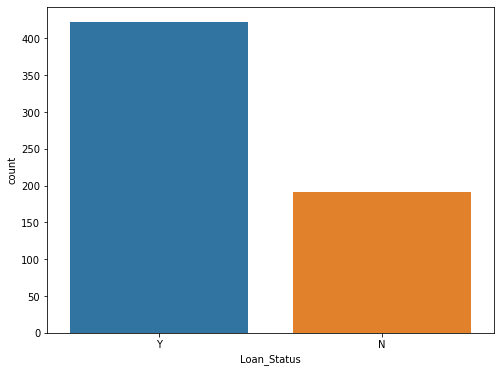

In [7]:
# let's look at the target percentage
plt.figure(figsize=(8,6))
sns.countplot(data['Loan_Status']);
print('The percentage of Y class : %.2f' % (data['Loan_Status'].value_counts()[0] / len(data)))
print('The percentage of N class : %.2f' % (data['Loan_Status'].value_counts()[1] / len(data)))

Since percentage of Y and N class are not 50-50, We can consider it as imbalanced dataset.  

In [8]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

As you van see, there are 422 people records who got loan approved on the other hand we have only 192 people records who got 
rejected. 

In [9]:
# Check the categorical and numerical variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In our dataset, we have seven categorical and four numerical features.The above table shows Credit_History is a numerical variable. I would like to investigate further about it.

In [10]:
data.Credit_History.value_counts().sort_values(ascending= False)

1.0    475
0.0     89
Name: Credit_History, dtype: int64

As shown above, Credit_History has two labels, either 1 or zero. It is very clear that this is categorical 
variable, not a numerical variable.

In [11]:
# I will change the type of Credit_History to object.
data['Credit_History'] = data['Credit_History'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


For simplicity, I will separate both categorical and numerical variables.

### (a) Numerical Features

In [12]:
# I will separate the numerical columns from the categorical
num_var = data.select_dtypes(exclude='object')
# Checking the variables
num_var.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


The data looks perfect.

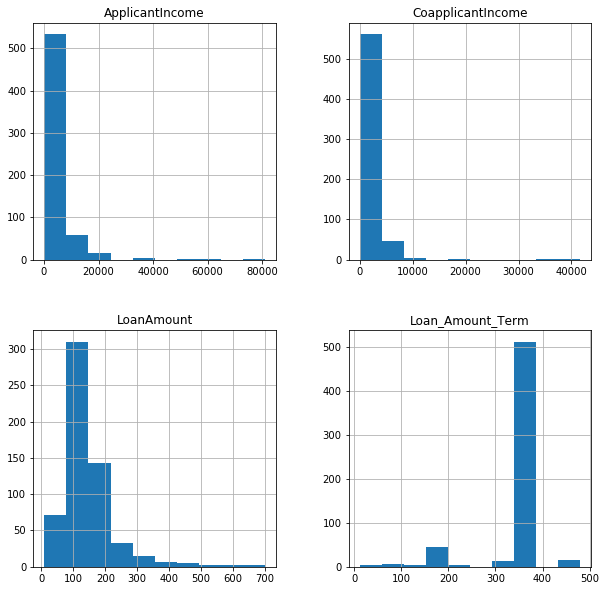

In [13]:
# Plot histogram of each column for visualization
num_var.hist(figsize=(10,10))
plt.show()

As shown in the above histogram plot, the data are not normaly distributed.Therefore, it requires more cleaning.At the first row of the above graph, both applicant income and coapplicant income are separate. Therefore, I can combine them. 

In [14]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
num_var['TotalIncome'] = num_var['ApplicantIncome'] + num_var['CoapplicantIncome']
# I will drop ApplicantIncome, CoapplicantIncome because we already combined them
num_var.drop(['ApplicantIncome', 'CoapplicantIncome' ], axis=1, inplace=True)
num_var.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,LoanAmount,Loan_Amount_Term,TotalIncome
0,NaN,360.0,5849.0
1,128.0,360.0,6091.0
2,66.0,360.0,3000.0
3,120.0,360.0,4941.0
4,141.0,360.0,6000.0


### (b) Categorical Features

In [15]:
# Now, it is time to work with categorical variables.
cat_var=data.select_dtypes(include='object')
cat_var.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


#### Visualization of categorical columns

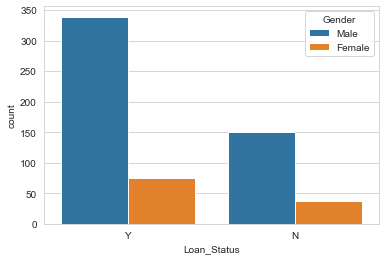

In [16]:
# Let' visualize the loan status based on gender.
sns.set_style('whitegrid')  
sns.countplot(x='Loan_Status',hue='Gender',data=cat_var)

As shown in the above graph, men applied for more loans compared to women. This is why men has higher rate of approval and rejection rate compared to women. 

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


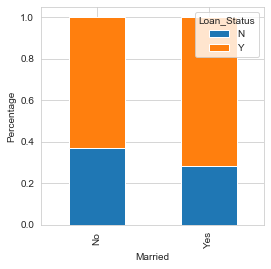

In [17]:
# Let' visualize the loan status based on marriage
print(pd.crosstab(data["Married"],data["Loan_Status"]))
Married=pd.crosstab(data["Married"],data["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Approval rate for married personal is more than unmarried people probably because of their join income. 

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


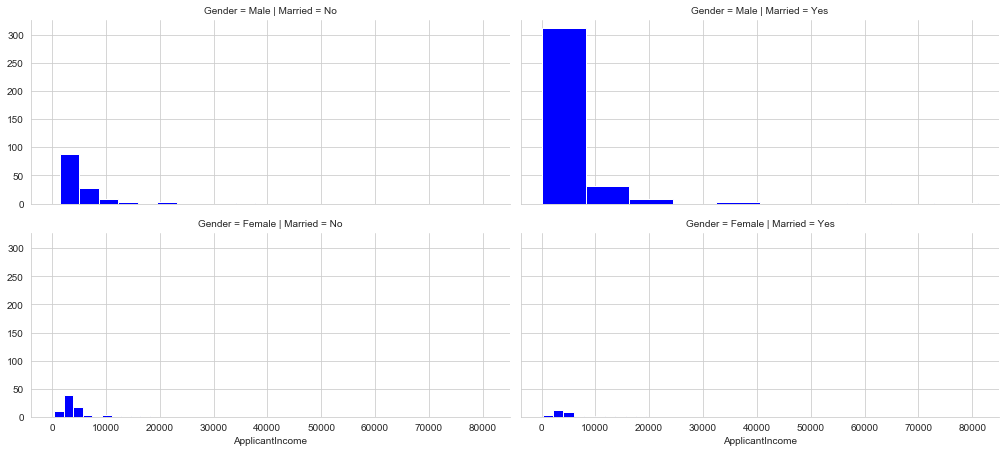

In [18]:
grid = sns.FacetGrid(data, row = 'Gender', col= 'Married', size=3.2, aspect=2.2)
grid.map(plt.hist, 'ApplicantIncome', color='blue');

From the above graph, it is obvious that no of married applicants are more than no of unmarried ones. 
From the income amount it seems to me the data shows monthly income not yearly.

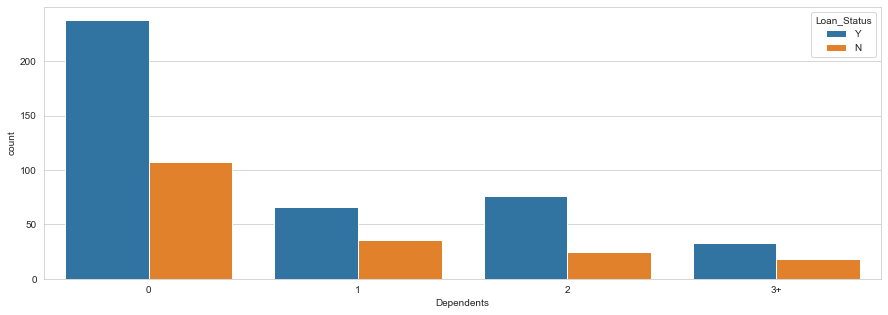

In [19]:
# Loan status based on no of dependents
plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=cat_var);


When no of dependent is zero, they get higher chance of getting a house loan. In these research dataset, people without dependent applied for loan more often. When there is no dependent, approximately 240 people without any dependent got approval for house loan and 100 people got rejected. When there are two dependents, more people got approval and less got rejected. On the other hand, when there are three dependents, approximately 50% of the people with loan approval status got rejected. In all the cases, more people got loan approval than being rejected. 

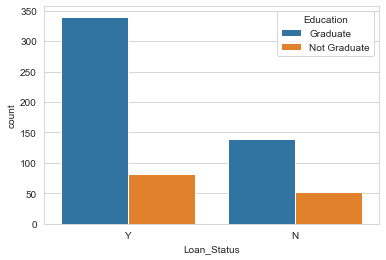

In [20]:
# I am curious to see loan status based on education
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Education',data=cat_var)

Among all the people who applied for house loan, there are more graduates than non graduates. Since graduates earn more money compared to non graduates, they have higher chance of getting loan approved. 

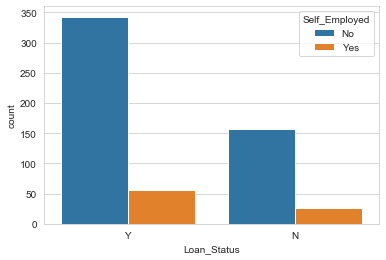

In [21]:
# Self_Employed
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Self_Employed',data=cat_var)

No of self employed people are much less compared to those who are working for a company.This is why no of loan approved status for self employed is very less.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


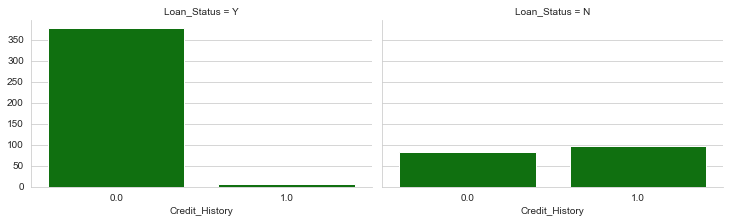

In [22]:
# Credit_History
grid = sns.FacetGrid(cat_var,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History', color='green');


The findings are
- The people who have positive credit history got loan approved.
- The people who have negative credit history got loan rejection.

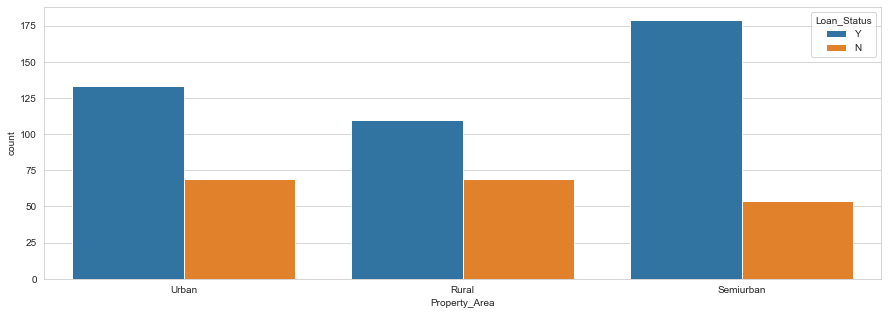

In [23]:
# Property Area
plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=cat_var);


The abvoe graph shows that those who live in semiurban area applied for loan more frequently compared to those who live in Urban, and rural area. This also implies that people like to live in Semi-urban area and avoid living in rural area. 

## Data Cleaning & Preprocessing


### 1. Missing values


#### (a) Numerical Features

In [24]:
# Checking missing values in numerical columns
#num_var.isnull().sum().sort_values(ascending=False)
num_var.apply(lambda x: sum(x.isnull()),axis=0) # checking missing values in each column of train dataset

LoanAmount          22
Loan_Amount_Term    14
TotalIncome          0
dtype: int64

There are missing values in LoanAmount and Loan_Amount_Term columns. There are no missing values in TotalIncome column.

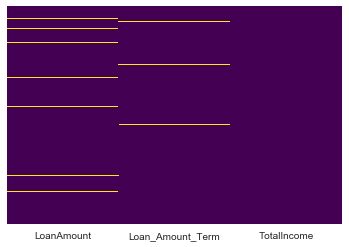

In [25]:
#I can use seaborn to create a simple heatmap to see where we are missing data!
sns.heatmap(num_var.isnull(),yticklabels=False,cbar=False,cmap='viridis')


The yellow lines shown above are the missing values. 

#### Missing values treatment for Numerical Variables

In [26]:
# Defining function to replace all the missing values using median
def impute_nan(df,variable):
    median=df[variable].median()
    df[variable].fillna(median,inplace=True)
    
# call the funtion to impute missing values     
for feature in num_var.columns:
    impute_nan(num_var,feature)
    

/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [27]:
# Let's check the data 
num_var.isnull().sum().sort_values(ascending=False)

LoanAmount          0
Loan_Amount_Term    0
TotalIncome         0
dtype: int64

There is no missing value in our numerical data.

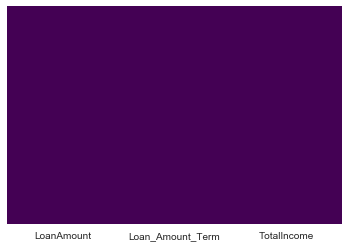

In [28]:
# plotting it again to see missing values
sns.heatmap(num_var.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Since there is no yellow line, there is no missing values in the data.

#### (b) Categorical Features

In [29]:
# Checking missing values in categorical columns
cat_var.isnull().sum().sort_values(ascending=False)

Credit_History    50
Self_Employed     32
Dependents        15
Gender            13
Married            3
Education          0
Property_Area      0
Loan_Status        0
dtype: int64

So many missing data in categorical variables! Credit_History has the highest no of missing values.It is possible they did not proceed with applicants' application.

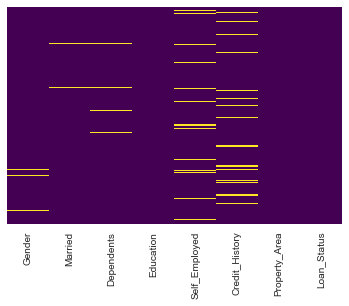

In [30]:
# It's time to visualize missing data
sns.heatmap(cat_var.isnull(),yticklabels=False,cbar=False,cmap='viridis')


The yellow lines show the missing data corresponding to their categories.
The graph reveals that the Credit_History has the highest no of missing data.

#### Missing values treatment for Categorical Variables

In [31]:
# Defining function to replace all the missing values using most frequent category.
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)
    
# call the funtion to impute missing values     
for feature in cat_var.columns:
    impute_nan(cat_var,feature)
    

In [32]:
# Let's check the data 
cat_var.isnull().sum().sort_values(ascending=False)

Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Loan_Status       0
dtype: int64

**There is no missing values in our categorical columns anymore.**

### 2. Duplicate Rows

In [33]:
# Checking for duplicate rows
number_duplicated_rows = data.duplicated().sum()
print("Number of duplicated rows: ", number_duplicated_rows)

Number of duplicated rows:  0


### 3. Outliers

#### (a) Numerical Features

In [34]:
# Checking outliers
num_var.describe()

,LoanAmount,Loan_Amount_Term,TotalIncome
count,614.000000,614.000000,614.000000
mean,145.752443,342.410423,7024.705081
std,84.107233,64.428629,6458.663872
min,9.000000,12.000000,1442.000000
25%,100.250000,360.000000,4166.000000
50%,128.000000,360.000000,5416.500000
75%,164.750000,360.000000,7521.750000
max,700.000000,480.000000,81000.000000


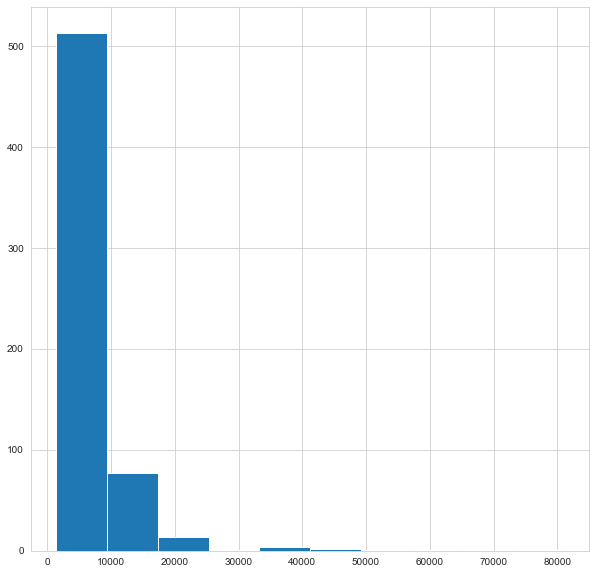

In [35]:
# Plot histogram of TotalIncome to check the distribution
num_var['TotalIncome'].hist(figsize=(10,10))
plt.show()

In the graph shown above, we can see that the TotalIncome histogram is slighty right skewed.

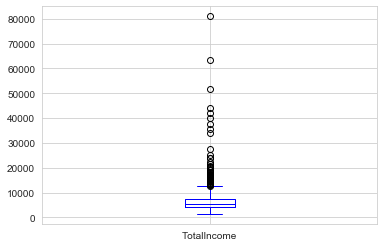

In [36]:
# Lets plot box plot to find outliers visually.
num_var.boxplot(column='TotalIncome', color= 'blue')

- The above Box Plot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.
- The extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

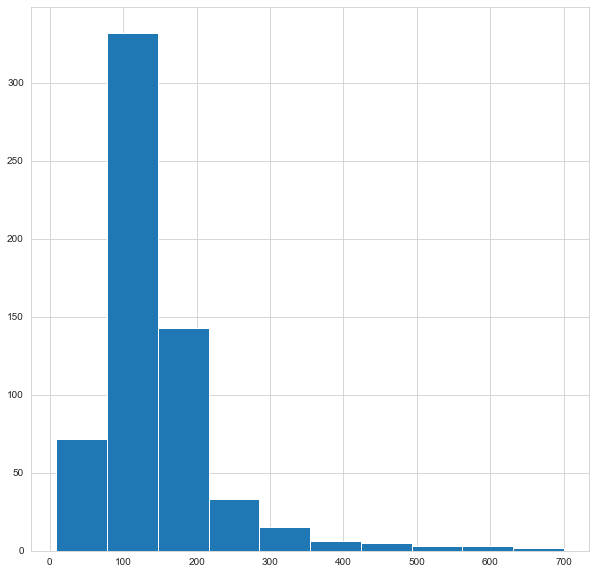

In [37]:
# Plot histogram of LoanAmount to check the distribution
num_var['LoanAmount'].hist(figsize=(10,10))
plt.show()

The LoanAmount distribution is closer to be normal distribution with right skewed. 
This distribution is better than TotalIncome

#### Outliers treatment for numerical variables

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


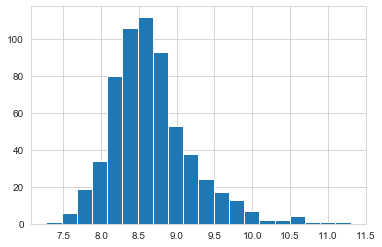

In [38]:
# Perform log transformation of TotalIncome to make it closer to normal distribution.
num_var['TotalIncome_log']= np.log(num_var['TotalIncome'])

# Looking at the distribtion of TotalIncome_log
num_var['TotalIncome_log'].hist(bins=20)

Now the above histogram plot looks more like normal distribution.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


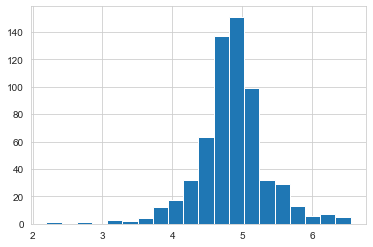

In [39]:
# Perform log transformation of LoanAmount to make it closer to normal distribution.
num_var['LoanAmount_log']= np.log(num_var['LoanAmount'])

# Looking at the distribtion of TotalIncome_log
num_var['LoanAmount_log'].hist(bins=20)

LoanAmount looks more like normally distributed after log transformation.

In [40]:
# Deleting the original variables "TotalIncome" and "LoanAmount"
num_var.drop(['TotalIncome','LoanAmount' ], axis=1, inplace=True)
num_var.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Loan_Amount_Term,TotalIncome_log,LoanAmount_log
0,360.0,8.674026,4.852030
1,360.0,8.714568,4.852030
2,360.0,8.006368,4.189655
3,360.0,8.505323,4.787492
4,360.0,8.699515,4.948760


## Scaling

In [41]:
#Lets bring all the numerical variables data within the same scale using MinMaxScaler 

from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
feature=num_var.columns
num_var[feature] = norm.fit_transform(num_var[feature])
num_var.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

,Loan_Amount_Term,TotalIncome_log,LoanAmount_log
0,0.74359,0.347590,0.609760
1,0.74359,0.357654,0.609760
2,0.74359,0.181853,0.457624
3,0.74359,0.305712,0.594936
4,0.74359,0.353918,0.631977


## Categorical Variables Encoding 


I am going to use LabelEncoder from Sklearn library which will encode labels with value between 0 and n_classes.

In [42]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
cat_var.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [43]:
# Separating the target variable from the dataset, then I am going to use binary encoding.
target_values = {'Y': 0 , 'N' : 1}
target = cat_var['Loan_Status']
cat_var.drop('Loan_Status', axis=1, inplace=True)
target = target.map(target_values)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
# Now applying level encoding for rest of the categorical variables.
for i in cat_var:
    cat_var[i] = le.fit_transform(cat_var[i])
# Let's have a look.
cat_var.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


Now, my categorical variables are ready for modeling.

### Combining all the variables

In [45]:
## Combined numeric and categorical variables together
df = pd.concat([cat_var, num_var, target], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Amount_Term,TotalIncome_log,LoanAmount_log,Loan_Status
0,1,0,0,0,0,1,2,0.74359,0.347590,0.609760,0
1,1,1,1,0,0,1,0,0.74359,0.357654,0.609760,1
2,1,1,0,0,1,1,2,0.74359,0.181853,0.457624,0
3,1,1,0,1,0,1,2,0.74359,0.305712,0.594936,0
4,1,0,0,0,0,1,2,0.74359,0.353918,0.631977,0


## Correlation check

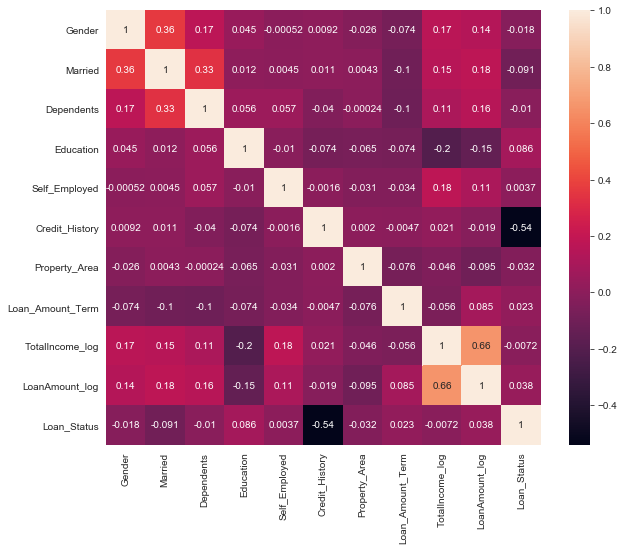

In [46]:
corr=df.corr()
fig= plt.figure(figsize=(10,8))
#sns.heatmap(corr, vmax=1,vmin= -1, square=True)
sns.heatmap(corr, vmax=1, square=True, annot = True)


As shown in the above correlation matrix plot, we can see TotalIncome_log and LoanAmount_log has a very high correlation, i.e. 0.66. Therefore, multi-collinearity exists between them. Therefore, we need to drop either of the TotalIncome_log and LoanAmount_log.  

In [47]:
# Dropping LoanAmount_log
df.drop('LoanAmount_log', axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Amount_Term,TotalIncome_log,Loan_Status
0,1,0,0,0,0,1,2,0.74359,0.347590,0
1,1,1,1,0,0,1,0,0.74359,0.357654,1
2,1,1,0,0,1,1,2,0.74359,0.181853,0
3,1,1,0,1,0,1,2,0.74359,0.305712,0
4,1,0,0,0,0,1,2,0.74359,0.353918,0


# Classification Algorithms
Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

### Train Test Split
Now, I am going to split our model based on train and test dataset. Based on training data, I am going to train my model and validate my model using test data. By using Sklearn train_test_split, I will divide my train dataset into two parts:train and test. 

In [48]:
# Dropping target variable.
X = df.drop('Loan_Status', axis=1).head()

In [49]:
# Making separate target column.
df.Loan_Status.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

In [50]:
# Importing train_test_split from sklearn.
from sklearn.model_selection import train_test_split

In [51]:
# Making separate train and test dataset.

X_train,X_test, y_train, y_test= train_test_split(df.drop('Loan_Status', axis=1),
                                                 df['Loan_Status'], test_size=0.30,
                                                 random_state=101)

The dataset has been divided into training and testing part. I took 70% data for training and rest of the 30% data for testing the model.

## Logistic Regression
### Training and Predicting
Let's import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [65]:
# Let's do the prediction.
prediction=logmodel.predict(X_test)

#### Model Evaluation 

In [66]:
import pandas as pd
df_predicted=pd.DataFrame()
df_predicted['Actual']=y_test
df_predicted['Predicted']=prediction
df_predicted.head()

,Actual,Predicted
216,1,0
55,0,0
593,0,0
438,1,0
351,1,0


From the above result, we can see some of the prediction were not correct. Now, Let's check how many are mislabelled.

In [67]:
import numpy as np
mislabel = np.sum((y_test!=prediction))
print("Total number of mislabelled data points from {} to {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 185 to 64


In [68]:
# Import confusion_matrix for evaluation.
from sklearn.metrics import confusion_matrix

In [69]:
# Checking the accuracy of the model.
accuracy=confusion_matrix(y_test,prediction )
accuracy

array([[121,   0],
       [ 64,   0]])

Text(70.0, 0.5, 'Actual')

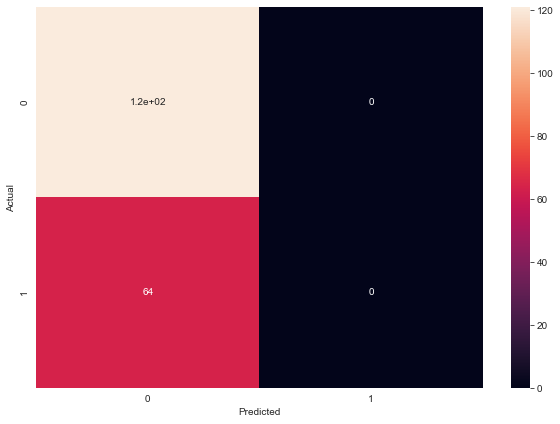

In [70]:
# Let's visualise it.
from sklearn.metrics import confusion_matrix
cm = (confusion_matrix(y_test,prediction))
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

The above graph demonstrates that True negative is 120,False Negative is 38, True Positive is 26, False Positive.We will 
use these data to calculate precision, recall, and f1.

In [71]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print("Accuracy of test set is = ",accuracy_score(y_test, prediction)*100,"%")

Accuracy of test set is =  65.4054054054054 %


For balance dataset, we can rely on accuracy. On the other hand, for imbalance dataset, we rather consider precision recall f1. Since our dataset is imbalance we are going to check the classification report.

### Classification Report
We can check precision,recall, f1-score using classification report!
#### Precision – What percent of our predictions were correct?
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

Precision – Accuracy of positive predictions.

Precision = TP/(TP + FP)
#### Recall – What percent of the positive cases did we catch? 

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

Recall: Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)
#### F1 score – What percent of positive predictions were correct? 

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2 x (Recall x Precision) / (Recall + Precision)

In [61]:
from sklearn.metrics import classification_report


In [62]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86       121
           1       0.93      0.41      0.57        64

    accuracy                           0.78       185
   macro avg       0.84      0.69      0.71       185
weighted avg       0.82      0.78      0.76       185



Our precision data indicates how good is our prediction. When the label is one, i.e. positive, its prediction accuracy
is 93%. This is a very good prediction. Here, the recall value is very low, i.e. 41% which states that out of total 
positive actual values only 41% prediction was right. On the other hand, the weighted average of f1-score is 76%. Thus, 
f1-score is somewhat all right.

## KNN

In [63]:
#Fitting KNN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors= 2, metric='minkowski', p=5 )  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=2, p=5)

In [64]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [65]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm1= confusion_matrix(y_test, y_pred) 
cm1

array([[120,   1],
       [ 46,  18]])

In [66]:
from sklearn.metrics import accuracy_score
print("Accuracy of test set is =",accuracy_score(y_test, y_pred)*100)

Accuracy of test set is = 74.5945945945946


In [67]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

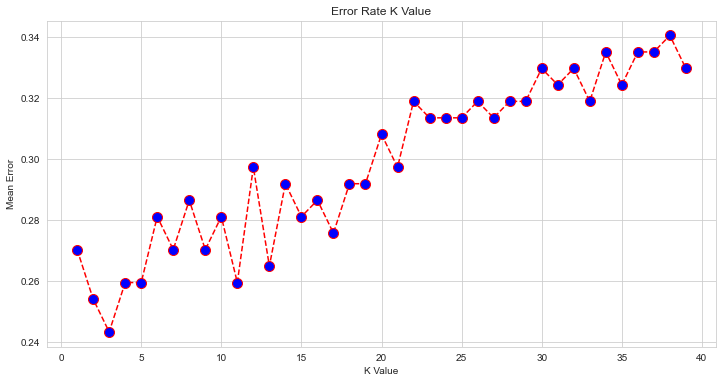

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


From the above graph, we can see than the mean error term is the lowest when k = 3 approximately  and afterthat it is showing upward trend.

## Decision Tree

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [70]:
y_pred=clf.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[118,   3],
       [ 37,  27]])

In [97]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7837837837837838


In [98]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9285714285714286
Recall: 0.40625


[Text(181.35000000000002, 190.26, 'X[5] <= 0.5\ngini = 0.419\nsamples = 429\nvalue = [301, 128]'),
 Text(111.60000000000001, 135.9, 'X[8] <= 0.717\ngini = 0.15\nsamples = 61\nvalue = [5, 56]'),
 Text(55.800000000000004, 81.53999999999999, 'X[8] <= 0.303\ngini = 0.126\nsamples = 59\nvalue = [4, 55]'),
 Text(27.900000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(83.7, 27.180000000000007, 'gini = 0.208\nsamples = 34\nvalue = [4, 30]'),
 Text(167.4, 81.53999999999999, 'X[8] <= 0.912\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(139.5, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(195.3, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(251.10000000000002, 135.9, 'X[8] <= 0.094\ngini = 0.315\nsamples = 368\nvalue = [296, 72]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(279.0, 81.53999999999999, 'X[8] <= 0.626\ngini = 0.307\nsamples = 365\nvalue = [296, 69

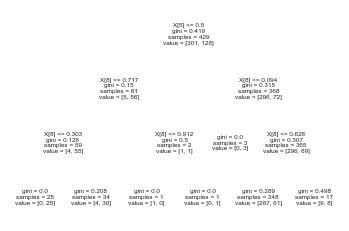

In [81]:
from sklearn import tree
tree.plot_tree(clf)

From above tree, we could see that some of the leafs have less than 5 samples hence our classifier might overfit. I can sweep hyper-parameter 'min_samples_leaf' to further improve test accuracy by keeping max_depth to 3

### Evaluation
We can check precision,recall,f1-score using classification report!

In [82]:
from sklearn.metrics import classification_report

print("The classification report is as follows...\n")
print(classification_report(y_test, y_pred))

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.76      0.98      0.86       121
           1       0.90      0.42      0.57        64

    accuracy                           0.78       185
   macro avg       0.83      0.70      0.71       185
weighted avg       0.81      0.78      0.76       185



Our precision data indicates how good is our prediction. When the label is one, i.e. positive, its prediction accuracy is 90%. This is a very good prediction. Here, the recall value is very low, i.e. 42% which states that out of total positive actual values only 41% prediction was right. On the other hand, the weighted average of f1-score is 76%. Thus, f1-score is somewhat all right.

## Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [84]:
y_pred = classifier.predict(X_test)

In [95]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7837837837837838


In [96]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9285714285714286
Recall: 0.40625


### Evaluation
We can check precision,recall,f1-score using classification report!

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[112   9]
 [ 35  29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       121
           1       0.76      0.45      0.57        64

    accuracy                           0.76       185
   macro avg       0.76      0.69      0.70       185
weighted avg       0.76      0.76      0.74       185

Accuracy: 0.7621621621621621


Our precision data indicates how good is our prediction. When the label is one, i.e. positive, its prediction accuracy is 86%. This is a very good prediction. Here, the recall value is very low, i.e. 41% which states that out of total positive actual values only 47% prediction was right. On the other hand, the weighted average of f1-score is 77%. Thus, f1-score is somewhat all right.

## SVM

In [88]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [89]:
clf

SVC(kernel='linear')

In [90]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7837837837837838


In [91]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9285714285714286
Recall: 0.40625


In [92]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [93]:
cm

array([[119,   2],
       [ 38,  26]])

In [94]:
from sklearn.metrics import classification_report

print("The classification report is as follows...\n")
print(classification_report(y_test, y_pred))

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.76      0.98      0.86       121
           1       0.93      0.41      0.57        64

    accuracy                           0.78       185
   macro avg       0.84      0.69      0.71       185
weighted avg       0.82      0.78      0.76       185



Our precision data indicates how good is our prediction. When the label is one, i.e. positive, its prediction accuracy is 93%. This is a very good prediction. Here, the recall value is very low, i.e. 41% which states that out of total positive actual values only 41% prediction was right. On the other hand, the weighted average of f1-score is 76%. Thus, f1-score is somewhat all right.

## Conclusion
1. Most of the models have accuracy close to each other. However, Logistic, decision tree and SVM model predictions are better. 
2. Correlation was not better. if there were more data, the predictions could have been better. In this analysis, I did
not use the test data from the csv file. Rather, I divided training dataset for both training and testing. In the future, I would use training dataset for training only and test dataset for test only.